In [1]:
from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

In [2]:
from IPython.display import Image
Image(url="../images/Title.png")

## Mechanics of Pairs Trading
Pairs trading is a market-neutral trading strategy that enables traders to potentially profit from both increases and decreases in market movements of two financial assets. 

Initially, traders identify pairs of assets with historically correlated prices, including equities, commodities, bonds, and other instruments influenced by similar market drivers. The trader then capitalizes on temporary deviations from the usual price relationship of these assets. 

For instance, profit potential arises when a trader pairs a long position (buy) with a short position (sell) as spreads deviate from historical average, adhering to the concept of mean reversion. Mean reversion is predicated on the assumption that the price of an asset will tend to converge to its average price over time.

## Objective of Pairs Trading
1. To profit from price movements
2. To diversify risk by spreading exposure across two instruments. 

## Use of Machine Learning
After identifying correlated assets, this study aims to use machine learning classification models to predict the price movements of the said assets, whether they converge (narrow spreads), diverge (widen spreads), or remain steady (minimal change). This will aid traders in formulating decisions on whether to buy or sell a particular pair of assets at a given point in time. For further study, regression models can be employed to forecast the future value of the spread between the two assets. 

## Quick Highlights
This study highights diversity as each model approaches the problem from different angles, capturing various aspects of the data's structure. After strong model performance, the study is applied in a real-world scenario where the model succesfully predicts market movements, demonstrating the practical utility of the model. 

In [3]:
import sys
sys.path.append('./notebooks')

import imports

<div class="alert alert-info">

### Data
    
</div>

The dataset consists of 33 market indices as columns, and 30 years of daily prices as rows,  
sourced from Kaggle: https://www.kaggle.com/code/asimislam/30-yrs-plots-of-market-data/input

In [4]:
from data_preprocessing import read_and_clean_data

df = read_and_clean_data('../data/30_yr_stock_market_data.csv')

# Display the cleaned data
df.head()

Initial Shape: (7754, 33)
NaN Percentage per Column:
Date                               0.000000
Dow Jones (^DJI)                   2.566417
Nasdaq (^IXIC)                     2.566417
S&P500 (^GSPC)                     2.566417
NYSE Composite (^NYA)              2.566417
Russell 2000 (^RUT)                2.566417
CBOE Volitility (^VIX)             2.566417
DAX Index (^GDAXI)                 1.934485
FTSE 100 (^FTSE)                   2.269796
Hang Seng Index (^HSI)             4.539592
Cocoa (CC=F)                      22.685066
Coffee (KC=F)                     22.723755
Corn (ZC=F)                       24.606655
Cotton (CT=F)                     22.697962
Live Cattle (LE=F)                29.739489
Orange Juice (OJ=F)               92.752128
Soybeans (ZS=F)                   24.709827
Sugar (SB=F)                      23.200929
Wheat (ZW=F)                      24.761413
Ethanol (EH=F)                    39.682744
Heating Oil (HO=F)                24.748517
Natural Gas (NG=F)     

,Date,Dow Jones (^DJI),Nasdaq (^IXIC),S&P500 (^GSPC),NYSE Composite (^NYA),Russell 2000 (^RUT),CBOE Volitility (^VIX),DAX Index (^GDAXI),FTSE 100 (^FTSE),Hang Seng Index (^HSI),...,Heating Oil (HO=F),Natural Gas (NG=F),Crude Oil-WTI (CL=F),Copper (HG=F),Gold (GC=F),Silver (SI=F),Treasury Yield 5 Years (^FVX),Treasury Bill 13 Week (^IRX),Treasury Yield 10 Years (^TNX),Treasury Yield 30 Years (^TYX)
2605,2003-12-30,10425.04004,2009.880005,1109.640015,6443.600098,565.469971,17.68,3965.159912,4470.399902,12526.74023,...,0.9294,6.600,32.790001,1.0400,416.899994,5.983,3.251,0.912,4.279,5.088
2608,2004-01-05,10544.07031,2047.359985,1122.219971,6534.580078,568.919983,17.49,4035.899902,4513.299805,13005.33008,...,0.9684,6.827,33.779999,1.0830,424.399994,6.233,3.359,0.902,4.387,5.175
2609,2004-01-06,10538.66016,2057.370117,1123.670044,6541.149902,569.890015,16.73,4035.439941,4505.200195,13036.32031,...,0.9774,7.082,33.700001,1.0670,422.799988,6.316,3.240,0.901,4.277,5.106
2610,2004-01-07,10529.03027,2077.679932,1126.329956,6525.299805,574.619995,15.50,4004.399902,4473.000000,13157.67969,...,0.9661,6.878,33.619999,1.0625,421.899994,6.251,3.210,0.886,4.246,5.084
2611,2004-01-08,10592.44043,2100.250000,1131.920044,6569.319824,579.619995,15.61,4045.429932,4494.200195,13203.58984,...,0.9841,7.094,33.980000,1.1045,424.000000,6.261,3.247,0.847,4.249,5.080


In [6]:
import numpy as np
data_new = df.copy()

# Describe only numeric columns.
description = data_new.select_dtypes(include=[np.number]).describe()
display(description)

,Dow Jones (^DJI),Nasdaq (^IXIC),S&P500 (^GSPC),NYSE Composite (^NYA),Russell 2000 (^RUT),CBOE Volitility (^VIX),DAX Index (^GDAXI),FTSE 100 (^FTSE),Hang Seng Index (^HSI),Cocoa (CC=F),...,Heating Oil (HO=F),Natural Gas (NG=F),Crude Oil-WTI (CL=F),Copper (HG=F),Gold (GC=F),Silver (SI=F),Treasury Yield 5 Years (^FVX),Treasury Bill 13 Week (^IRX),Treasury Yield 10 Years (^TNX),Treasury Yield 30 Years (^TYX)
count,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,...,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000
mean,18386.806392,5462.282402,2126.880857,10353.522530,1134.292624,19.204683,9252.874592,6257.537908,21797.621113,2430.931138,...,2.170069,4.530363,70.094671,3.012245,1235.089114,18.488627,2.319159,1.384004,2.899854,3.518833
std,8321.622463,3939.021209,1075.177313,3059.930781,495.440687,8.853720,3585.077284,968.960858,4608.272595,563.676939,...,0.730864,2.342880,22.405159,0.827827,451.541557,7.283451,1.295877,1.692604,1.127171,1.014694
min,6547.049805,1268.640015,676.530029,4226.310059,343.260010,9.140000,3646.989990,3512.100098,10967.650390,1312.000000,...,0.610400,1.495000,-37.630001,1.040000,374.799988,5.514000,0.195000,-0.105000,0.499000,0.937000
25%,11319.889892,2344.949951,1265.319977,7845.697510,713.367508,13.420000,6131.997559,5635.674805,19182.995115,2081.000000,...,1.635900,2.795000,52.117499,2.552125,919.574982,14.191000,1.370000,0.068000,2.000000,2.832750
50%,15877.665040,4032.344971,1793.500000,10003.514650,1072.609985,16.680000,9035.575195,6323.650147,22107.074220,2450.000000,...,2.007450,3.814500,68.014999,3.085250,1266.300049,17.216001,1.944000,0.339000,2.749000,3.364500
75%,25241.542483,7592.109863,2784.944946,12580.647708,1522.700012,22.262500,12342.767580,7089.650025,24711.467285,2867.000000,...,2.855425,5.882500,87.862501,3.592125,1615.049988,22.756750,3.340250,2.285750,3.837250,4.474000
max,36799.648440,16057.440430,4793.540039,17353.759770,2442.739990,82.690002,16469.750000,8012.500000,33154.121090,4370.000000,...,5.135400,15.378000,145.289993,4.929000,2067.899902,47.520000,5.227000,5.348000,5.248000,5.558000


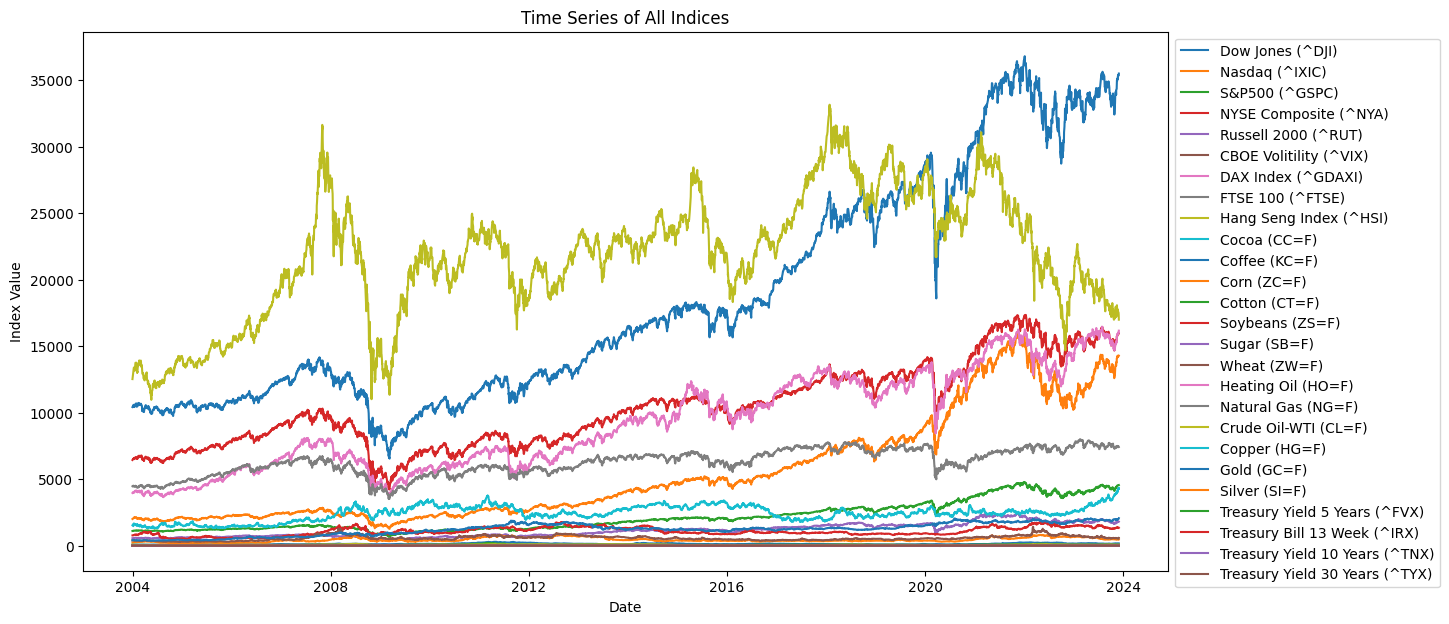

In [7]:
import matplotlib.pyplot as plt
# Plot time series for all indices
data_new.set_index('Date', inplace=True)
plt.figure(figsize=(14, 7))
for column in data_new.columns:
    plt.plot(data_new.index, data_new[column], label=column)

plt.title('Time Series of All Indices')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.savefig('Indices-Time.png', bbox_inches='tight')
plt.show()

<div class="alert alert-info">

### Pairs Selection

</div>

After reviewing the historical prices, we proceed to identify pairs of assets that exhibit strong correlations. Initial observations reveal significant correlations within similar asset classes, such as between equity (upper left quadrant) and bond indices (lower right quadrant). Notably, a remarkable positive correlation between natural gas and bonds and natural gas and equities has been identified.

Consequently, for this analysis, we select natural gas and the Treasury Yield 10 Years, which demonstrate a correlation of approximately 0.70, to explore the dynamics between natural gas and representative bond indices.

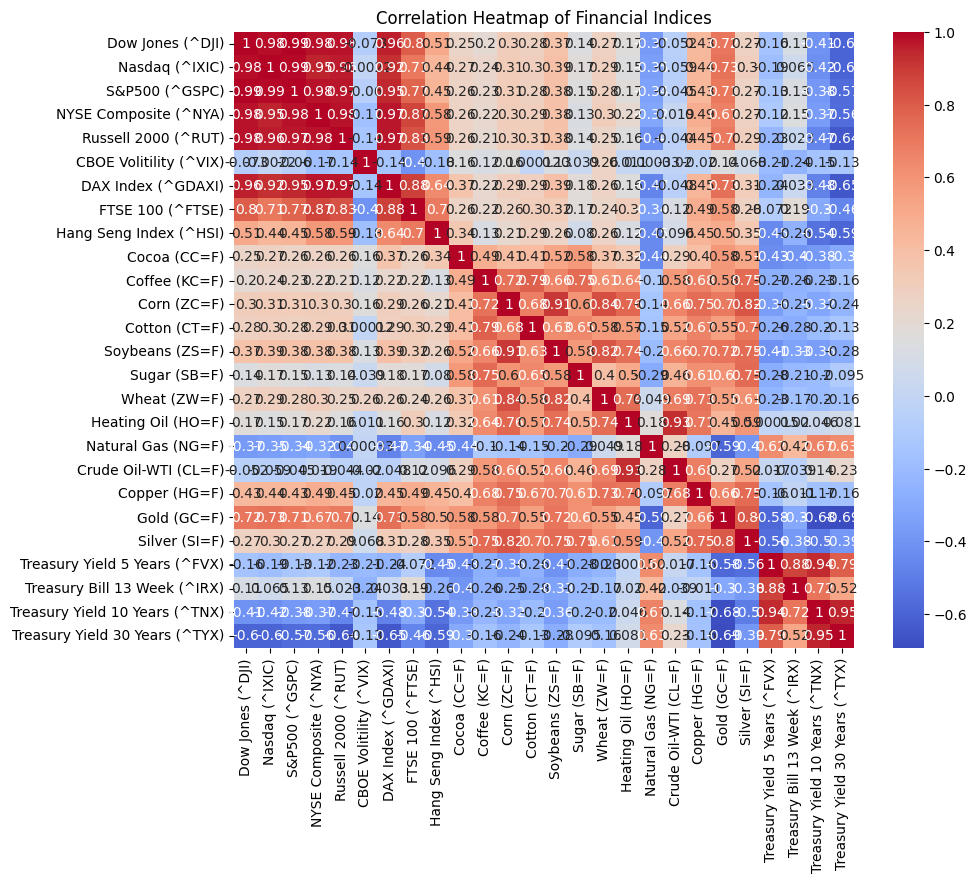

In [9]:
import seaborn as sns
# Create a correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data_new.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Financial Indices')
plt.savefig('Indices-Corr.png', bbox_inches='tight')
plt.show()

In the process of creating a predictive model, first, eliminate redundant independent variables to address the issue of multicollinearity, which was observed among certain financial indices as mentioned. Multicollinearity arises when two or more independent variables in a regression model are highly correlated, leading to inflated standard errors and unreliable coefficient estimates that complicate the interpretation of the model's outputs.  

After a thorough analysis, we decided to remove the Dow Jones Industrial Average (DJIA),  NYSE Composite (NYA), Russell 2000 (^RUT), 13-week, 5Yr and 30Y Treasury Yields from our model. These indices exhibited a high degree of correlation with the S&P 500 (GSPC) and 10Y YS Treasury Yield, which we retained due to its comprehensive market representation.  

See list of remaining indices:

In [10]:
# Drop redundant independent variables
df = data_new.drop(['Dow Jones (^DJI)','Nasdaq (^IXIC)', 'NYSE Composite (^NYA)','Russell 2000 (^RUT)',
                    'Treasury Yield 5 Years (^FVX)','Treasury Bill 13 Week (^IRX)','Treasury Yield 30 Years (^TYX)'],
                   axis=1)

In [11]:
df.columns.tolist()

['S&P500 (^GSPC)',
 'CBOE Volitility (^VIX)',
 'DAX Index (^GDAXI)',
 'FTSE 100 (^FTSE)',
 'Hang Seng Index (^HSI)',
 'Cocoa (CC=F)',
 'Coffee (KC=F)',
 'Corn (ZC=F)',
 'Cotton (CT=F)',
 'Soybeans (ZS=F)',
 'Sugar (SB=F)',
 'Wheat (ZW=F)',
 'Heating Oil (HO=F)',
 'Natural Gas (NG=F)',
 'Crude Oil-WTI (CL=F)',
 'Copper (HG=F)',
 'Gold (GC=F)',
 'Silver (SI=F)',
 'Treasury Yield 10 Years (^TNX)']

<div class="alert alert-info">

### More Data Preprocessing
    
</div>

To ensure uniformity across the indices, I employed the StandardScaler() function for normalization. This choice is strategic because the StandardScaler does not confine values within a predetermined range. This is particularly beneficial when dealing with index prices, as it preserves the natural variability and distribution of the data. By standardizing the data, we transform the prices to have a mean of zero and a standard deviation of one, facilitating a more meaningful comparison across different financial instruments without distorting their inherent price dynamics.

In [14]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Make sure to exclude any non-numeric columns or the 'Date' column if present.
numeric_data = df.select_dtypes(include=[np.number])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numeric data and transform it
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Create a DataFrame from the scaled numeric data with the same index and columns as the original numeric data
df_scaled = pd.DataFrame(numeric_data_scaled, index=df.index, columns=numeric_data.columns)

# Show the first few rows of the scaled data
display(df_scaled.shape)
display(df_scaled.head())

(4676, 19)

,S&P500 (^GSPC),CBOE Volitility (^VIX),DAX Index (^GDAXI),FTSE 100 (^FTSE),Hang Seng Index (^HSI),Cocoa (CC=F),Coffee (KC=F),Corn (ZC=F),Cotton (CT=F),Soybeans (ZS=F),Sugar (SB=F),Wheat (ZW=F),Heating Oil (HO=F),Natural Gas (NG=F),Crude Oil-WTI (CL=F),Copper (HG=F),Gold (GC=F),Silver (SI=F),Treasury Yield 10 Years (^TNX)
Date,,,,,,,,,,,,,,,,,,,
2003-12-30,-0.946216,-0.172227,-1.475081,-1.844583,-2.012006,-1.586062,-1.748738,-1.291826,-0.044363,-1.003139,-1.878579,-1.038239,-1.697719,0.883468,-1.665182,-2.382691,-1.812185,-1.717176,1.223677
2004-01-05,-0.934514,-0.193689,-1.455347,-1.800305,-1.908140,-1.697840,-1.638027,-1.214460,0.012837,-0.938817,-1.887674,-1.025166,-1.644352,0.980367,-1.620991,-2.330742,-1.795573,-1.682848,1.319503
2004-01-06,-0.933165,-0.279538,-1.455476,-1.808665,-1.901415,-1.562997,-1.605596,-1.224131,0.007636,-0.940487,-1.860391,-1.048406,-1.632036,1.089219,-1.624562,-2.350072,-1.799117,-1.671451,1.221903
2004-01-07,-0.930691,-0.418477,-1.464135,-1.841900,-1.875077,-1.399765,-1.632435,-1.233801,-0.057562,-0.969725,-1.844021,-1.042596,-1.647499,1.002138,-1.628133,-2.355508,-1.801110,-1.680376,1.194397
2004-01-08,-0.925491,-0.406052,-1.452689,-1.820018,-1.865113,-1.454767,-1.643618,-1.222519,-0.013963,-0.949676,-1.876761,-1.051311,-1.622868,1.094342,-1.612063,-2.304768,-1.796459,-1.679003,1.197059


Now, we proceed to generate the spreads between an index and the Treasury Yield 10 Years. 

In [15]:
# Create the 'spread_data' DataFrame as per the instructions
spread_data = pd.DataFrame(index=df_scaled.index)

# Calculate the spread between each column and the 'Treasury Yield 10 Years (^TNX)' column
for column in df_scaled.columns[:-1]:  # Exclude the last column which is the reference
    spread_column_name = f"Spread_{column}_TNX"
    spread_data[spread_column_name] = df_scaled[column] - df_scaled['Treasury Yield 10 Years (^TNX)']

# Add the 'Year' column by extracting the year from the index
spread_data['Year'] = df_scaled.index.year

year_column = spread_data['Year']
spread_data.drop('Year', axis=1, inplace=True)
spread_data.insert(0, 'Year', year_column)

# Display the shape and the first few rows of the 'spread_data' DataFrame
display(spread_data.shape)
display(spread_data.head())

(4676, 19)

,Year,Spread_S&P500 (^GSPC)_TNX,Spread_CBOE Volitility (^VIX)_TNX,Spread_DAX Index (^GDAXI)_TNX,Spread_FTSE 100 (^FTSE)_TNX,Spread_Hang Seng Index (^HSI)_TNX,Spread_Cocoa (CC=F)_TNX,Spread_Coffee (KC=F)_TNX,Spread_Corn (ZC=F)_TNX,Spread_Cotton (CT=F)_TNX,Spread_Soybeans (ZS=F)_TNX,Spread_Sugar (SB=F)_TNX,Spread_Wheat (ZW=F)_TNX,Spread_Heating Oil (HO=F)_TNX,Spread_Natural Gas (NG=F)_TNX,Spread_Crude Oil-WTI (CL=F)_TNX,Spread_Copper (HG=F)_TNX,Spread_Gold (GC=F)_TNX,Spread_Silver (SI=F)_TNX
Date,,,,,,,,,,,,,,,,,,,
2003-12-30,2003,-2.169893,-1.395904,-2.698758,-3.068260,-3.235683,-2.809739,-2.972415,-2.515504,-1.268040,-2.226816,-3.102257,-2.261916,-2.921396,-0.340210,-2.888859,-3.606368,-3.035862,-2.940853
2004-01-05,2004,-2.254017,-1.513192,-2.774850,-3.119807,-3.227643,-3.017343,-2.957529,-2.533962,-1.306666,-2.258319,-3.207176,-2.344669,-2.963855,-0.339135,-2.940493,-3.650245,-3.115076,-3.002350
2004-01-06,2004,-2.155068,-1.501440,-2.677378,-3.030567,-3.123317,-2.784900,-2.827499,-2.446033,-1.214266,-2.162390,-3.082294,-2.270309,-2.853939,-0.132683,-2.846464,-3.571974,-3.021019,-2.893353
2004-01-07,2004,-2.125088,-1.612874,-2.658532,-3.036297,-3.069474,-2.594163,-2.826832,-2.428199,-1.251960,-2.164122,-3.038418,-2.236993,-2.841896,-0.192260,-2.822530,-3.549905,-2.995507,-2.874773
2004-01-08,2004,-2.122550,-1.603111,-2.649748,-3.017077,-3.062172,-2.651827,-2.840677,-2.419578,-1.211022,-2.146736,-3.073820,-2.248370,-2.819927,-0.102717,-2.809122,-3.501827,-2.993518,-2.876062


Next, we calculate the mean spread per year.

In [16]:
# Group by year and calculate the mean spread for each column
average_spread_per_year = spread_data.groupby(spread_data.index.year).mean()

display(average_spread_per_year.shape)
display(average_spread_per_year.head())

(21, 19)

,Year,Spread_S&P500 (^GSPC)_TNX,Spread_CBOE Volitility (^VIX)_TNX,Spread_DAX Index (^GDAXI)_TNX,Spread_FTSE 100 (^FTSE)_TNX,Spread_Hang Seng Index (^HSI)_TNX,Spread_Cocoa (CC=F)_TNX,Spread_Coffee (KC=F)_TNX,Spread_Corn (ZC=F)_TNX,Spread_Cotton (CT=F)_TNX,Spread_Soybeans (ZS=F)_TNX,Spread_Sugar (SB=F)_TNX,Spread_Wheat (ZW=F)_TNX,Spread_Heating Oil (HO=F)_TNX,Spread_Natural Gas (NG=F)_TNX,Spread_Crude Oil-WTI (CL=F)_TNX,Spread_Copper (HG=F)_TNX,Spread_Gold (GC=F)_TNX,Spread_Silver (SI=F)_TNX
Date,,,,,,,,,,,,,,,,,,,
2003,2003.0,-2.169893,-1.395904,-2.698758,-3.068260,-3.235683,-2.809739,-2.972415,-2.515504,-1.268040,-2.226816,-3.102257,-2.261916,-2.921396,-0.340210,-2.888859,-3.606368,-3.035862,-2.940853
2004,2004.0,-2.127808,-1.614568,-2.672300,-2.995435,-3.130392,-2.840243,-2.675496,-2.419887,-2.002210,-2.292475,-2.779404,-2.534560,-2.631862,-0.501635,-2.477383,-3.278587,-3.029016,-2.820983
2005,2005.0,-2.084028,-1.956033,-2.504319,-2.360880,-2.845495,-2.927637,-2.006519,-2.726078,-2.235962,-2.792495,-2.334508,-2.715451,-1.946391,0.701914,-1.820842,-2.829820,-2.978196,-2.761256
2006,2006.0,-2.438489,-2.397245,-2.617588,-2.028165,-2.749148,-3.324986,-2.444011,-2.851270,-2.608915,-3.304637,-1.943831,-2.683752,-2.125554,-0.638424,-1.849651,-1.576501,-3.076674,-2.635698
2007,2007.0,-2.141270,-1.720531,-2.036321,-1.388118,-1.240627,-2.514463,-2.085700,-1.980537,-2.267779,-2.264473,-2.659406,-1.187899,-1.722264,-0.434057,-1.444333,-1.282202,-2.730954,-2.240091


The spreads and mean spreads are now aggregated in one dataframe which computes the difference of each. 

In [17]:
# Create the new DataFrame with the differences
df_diff = pd.DataFrame(index=spread_data.index)
for column in spread_data.columns.difference(['Year']):
    # For each column, calculate the difference between the spread and the yearly average
    yearly_avg = average_spread_per_year[column].reindex(spread_data['Year']).values
    df_diff[column] = spread_data[column] - yearly_avg

display(df_diff.shape)
display(df_diff.head())

(4676, 18)

,Spread_CBOE Volitility (^VIX)_TNX,Spread_Cocoa (CC=F)_TNX,Spread_Coffee (KC=F)_TNX,Spread_Copper (HG=F)_TNX,Spread_Corn (ZC=F)_TNX,Spread_Cotton (CT=F)_TNX,Spread_Crude Oil-WTI (CL=F)_TNX,Spread_DAX Index (^GDAXI)_TNX,Spread_FTSE 100 (^FTSE)_TNX,Spread_Gold (GC=F)_TNX,Spread_Hang Seng Index (^HSI)_TNX,Spread_Heating Oil (HO=F)_TNX,Spread_Natural Gas (NG=F)_TNX,Spread_S&P500 (^GSPC)_TNX,Spread_Silver (SI=F)_TNX,Spread_Soybeans (ZS=F)_TNX,Spread_Sugar (SB=F)_TNX,Spread_Wheat (ZW=F)_TNX
Date,,,,,,,,,,,,,,,,,,
2003-12-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2004-01-05,0.101377,-0.177100,-0.282033,-0.371657,-0.114075,0.695544,-0.463110,-0.102549,-0.124373,-0.086060,-0.097251,-0.331993,0.162500,-0.126209,-0.181368,0.034156,-0.427773,0.189891
2004-01-06,0.113128,0.055343,-0.152002,-0.293387,-0.026146,0.787944,-0.369081,-0.005078,-0.035133,0.007996,0.007075,-0.222077,0.368952,-0.027260,-0.072371,0.130085,-0.302890,0.264251
2004-01-07,0.001694,0.246081,-0.151336,-0.271318,-0.008312,0.750251,-0.345147,0.013769,-0.040862,0.033509,0.060918,-0.210035,0.309376,0.002719,-0.053790,0.128353,-0.259015,0.297567
2004-01-08,0.011457,0.188417,-0.165181,-0.223239,0.000309,0.791188,-0.331739,0.022553,-0.021643,0.035498,0.068220,-0.188066,0.398918,0.005257,-0.055079,0.145740,-0.294416,0.286190


Labels are placed as follows:  
> divergence if the spread widened by more than 0.05  
> steady if the spread did not move within a +/- 0.05 allowance  
> convergence if the spread narrowed by more than -0.05

In [18]:
# Create the new DataFrame with the labels based on the conditions provided
df_labels = df_diff.applymap(lambda x: 'divergence' if x > 0.05 else ('convergence' if x < -0.05 else 'steady'))


display(df_labels.shape)
display(df_labels.head())

(4676, 18)

,Spread_CBOE Volitility (^VIX)_TNX,Spread_Cocoa (CC=F)_TNX,Spread_Coffee (KC=F)_TNX,Spread_Copper (HG=F)_TNX,Spread_Corn (ZC=F)_TNX,Spread_Cotton (CT=F)_TNX,Spread_Crude Oil-WTI (CL=F)_TNX,Spread_DAX Index (^GDAXI)_TNX,Spread_FTSE 100 (^FTSE)_TNX,Spread_Gold (GC=F)_TNX,Spread_Hang Seng Index (^HSI)_TNX,Spread_Heating Oil (HO=F)_TNX,Spread_Natural Gas (NG=F)_TNX,Spread_S&P500 (^GSPC)_TNX,Spread_Silver (SI=F)_TNX,Spread_Soybeans (ZS=F)_TNX,Spread_Sugar (SB=F)_TNX,Spread_Wheat (ZW=F)_TNX
Date,,,,,,,,,,,,,,,,,,
2003-12-30,steady,steady,steady,steady,steady,steady,steady,steady,steady,steady,steady,steady,steady,steady,steady,steady,steady,steady
2004-01-05,divergence,convergence,convergence,convergence,convergence,divergence,convergence,convergence,convergence,convergence,convergence,convergence,divergence,convergence,convergence,steady,convergence,divergence
2004-01-06,divergence,divergence,convergence,convergence,steady,divergence,convergence,steady,steady,steady,steady,convergence,divergence,steady,convergence,divergence,convergence,divergence
2004-01-07,steady,divergence,convergence,convergence,steady,divergence,convergence,steady,steady,steady,divergence,convergence,divergence,steady,convergence,divergence,convergence,divergence
2004-01-08,steady,divergence,convergence,convergence,steady,divergence,convergence,steady,steady,steady,divergence,convergence,divergence,steady,convergence,divergence,convergence,divergence


Labels are further mapped as follows:  
> 1 if divergence  
> 0 if steady  
> -1 if convergence

In [19]:
# Drop the first row
df_labels_mapped = df_labels.iloc[1:]

# Apply the mapping to convert labels from text to numbers
mapping = {'divergence': 1, 'convergence': -1, 'steady': 0}
df_labels_mapped = df_labels.applymap(lambda x: mapping.get(x, x))

display(df_labels_mapped.shape)
display(df_labels_mapped.head())

(4676, 18)

,Spread_CBOE Volitility (^VIX)_TNX,Spread_Cocoa (CC=F)_TNX,Spread_Coffee (KC=F)_TNX,Spread_Copper (HG=F)_TNX,Spread_Corn (ZC=F)_TNX,Spread_Cotton (CT=F)_TNX,Spread_Crude Oil-WTI (CL=F)_TNX,Spread_DAX Index (^GDAXI)_TNX,Spread_FTSE 100 (^FTSE)_TNX,Spread_Gold (GC=F)_TNX,Spread_Hang Seng Index (^HSI)_TNX,Spread_Heating Oil (HO=F)_TNX,Spread_Natural Gas (NG=F)_TNX,Spread_S&P500 (^GSPC)_TNX,Spread_Silver (SI=F)_TNX,Spread_Soybeans (ZS=F)_TNX,Spread_Sugar (SB=F)_TNX,Spread_Wheat (ZW=F)_TNX
Date,,,,,,,,,,,,,,,,,,
2003-12-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004-01-05,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,0,-1,1
2004-01-06,1,1,-1,-1,0,1,-1,0,0,0,0,-1,1,0,-1,1,-1,1
2004-01-07,0,1,-1,-1,0,1,-1,0,0,0,1,-1,1,0,-1,1,-1,1
2004-01-08,0,1,-1,-1,0,1,-1,0,0,0,1,-1,1,0,-1,1,-1,1


Here are quick summary statistics of the dataset. An almost even split between converged and diverged prices and only about 12% exhibited steady price movements.

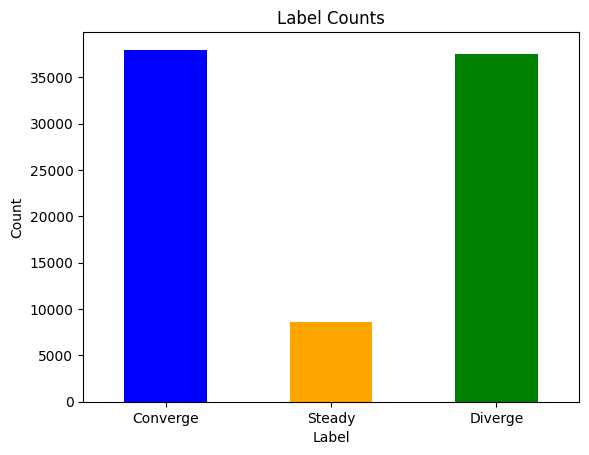

In [20]:
# Count the occurrences of each label (-1, 0, 1)
label_counts = df_labels_mapped.apply(pd.value_counts).fillna(0).astype(int).sum(axis=1)

# Plot the histogram
label_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Label Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Converge', 'Steady', 'Diverge'], rotation=0)
plt.show()

In [21]:
df_features = df_labels_mapped.drop(df_labels_mapped.columns[13], axis=1) 

<div class="alert alert-info">

### Data Segregation
    
</div>

With the market prices of various indices at our disposal, our objective is to delineate the spread between natural gas and the US 10-Year yield.

In [22]:
# Define X to include all columns except 'Spread_Natural Gas (NG=F)_TNX'
X = df_features.drop('Spread_Natural Gas (NG=F)_TNX', axis=1)

# Define y to be the column 'Spread_Natural Gas (NG=F)_TNX'
y = df_labels_mapped['Spread_Natural Gas (NG=F)_TNX']

Features:

In [23]:
display(X.shape)
display(X.head())

(4676, 16)

,Spread_CBOE Volitility (^VIX)_TNX,Spread_Cocoa (CC=F)_TNX,Spread_Coffee (KC=F)_TNX,Spread_Copper (HG=F)_TNX,Spread_Corn (ZC=F)_TNX,Spread_Cotton (CT=F)_TNX,Spread_Crude Oil-WTI (CL=F)_TNX,Spread_DAX Index (^GDAXI)_TNX,Spread_FTSE 100 (^FTSE)_TNX,Spread_Gold (GC=F)_TNX,Spread_Hang Seng Index (^HSI)_TNX,Spread_Heating Oil (HO=F)_TNX,Spread_Silver (SI=F)_TNX,Spread_Soybeans (ZS=F)_TNX,Spread_Sugar (SB=F)_TNX,Spread_Wheat (ZW=F)_TNX
Date,,,,,,,,,,,,,,,,
2003-12-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004-01-05,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,0,-1,1
2004-01-06,1,1,-1,-1,0,1,-1,0,0,0,0,-1,-1,1,-1,1
2004-01-07,0,1,-1,-1,0,1,-1,0,0,0,1,-1,-1,1,-1,1
2004-01-08,0,1,-1,-1,0,1,-1,0,0,0,1,-1,-1,1,-1,1


Target:

In [24]:
y

Date
2003-12-30    0
2004-01-05    1
2004-01-06    1
2004-01-07    1
2004-01-08    1
             ..
2023-11-22   -1
2023-11-24   -1
2023-11-27   -1
2023-11-28   -1
2023-11-29   -1
Name: Spread_Natural Gas (NG=F)_TNX, Length: 4676, dtype: int64

An 80%-20 train-test set split is employed.

In [26]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<div class="alert alert-info">

### Model Training
    
</div>

Four models are chosen for their varying approaches to prediction, offering a broad spectrum of insights into the dataset. Each model undergoes a series of trials (N=3) to fine-tune its hyperparameters for optimal performance. Following is an overview of models used including the hyperparameters tested:  

1. k-Nearest Neighbors (kNN)  
- intuitive and straightforward  
- n_neighbors range (2,6)  
2. Logistic Regression  
- excels in binary classification problems  
- regularization strength C from 1e^-4 to 1e^4  
- and regularization type l1 or l2 to mitigate overfitting and improve generalization  
3. Random Forest
- powerful ensemble technique known for its ability to handle non-linear data, reducing the risk of overfitting
- max_depth range [2,3,4,5] to control depth of trees
4. Gradient Boosting Method
- renowned for its predictive accuracy by sequentially correcting errors of weak classifiers through strong ones
- max_depth range [2,3,4,5] to control depth of trees

Each function systematically explores a range of hyperparameters to identify the configuration that yields the best balance between training accuracy and test performance, thus ensuring the model's ability to generalize well to unseen data. The following graph illustrates which features significantly impact the model.   
Top-Bottom: Logistic, Random Forest, Gradient Boosting Method

In [27]:
# Functions for running the different ML models

Number_trials=3


def train_kNN(X, y):
    n_neighbors_tuning = (2,6)  
    score_train = []
    score_test = []

    for seed in range(Number_trials):
        training_mse = []  
        test_mse = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        for n_neighbors in n_neighbors_tuning:
            start_time = time.time()  # Time the training process
            knn = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
            
            # Calculate Mean Squared Error as a performance metric
            training_mse.append(mean_squared_error(y_train, knn.predict(X_train)))
            test_mse.append(mean_squared_error(y_test, knn.predict(X_test)))
            
            run_time = time.time() - start_time

        score_train.append(training_mse)
        score_test.append(test_mse)

    # Convert MSE to RMSE and calculate the mean over all trials
    train_score = np.mean(np.sqrt(score_train), axis=0)
    test_score = np.mean(np.sqrt(score_test), axis=0)
                         
    # Find the best performing n_neighbors value
    best_index = np.argmin(test_score)
    
    return ['kNN Regressor', train_score[best_index], test_score[best_index], 
            'n_neighbors = {0}'.format(n_neighbors_tuning[best_index]), 'N/A', run_time]


def train_logistic(X, y, reg):
    C = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
    score_train = []
    score_test = []
    weighted_coefs = []

    for seed in range(Number_trials):
        training_accuracy = []
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                lr = LogisticRegression(C=alpha_run, penalty=reg, solver='liblinear', fit_intercept=True).fit(X_train, y_train)
            elif reg == 'l2':
                lr = LogisticRegression(C=alpha_run, penalty=reg, dual=False, fit_intercept=True).fit(X_train, y_train)

            training_accuracy.append(lr.score(X_train, y_train))
            test_accuracy.append(lr.score(X_test, y_test))
            coefs = lr.coef_[0]  # Assuming binary classification and taking the first row for coefficients
            weighted_coefs.append(coefs)  # Append all the computed coefficients per trial

        score_train.append(training_accuracy)
        score_test.append(test_accuracy)

    mean_coefs = np.mean(weighted_coefs, axis=0)  # Get the mean of the weighted coefficients over all the trials
    score = np.mean(score_test, axis=0)
    train_score = np.mean(score_train, axis=0)
    
    # Plot the weight of the parameters
    top_predictor_index = np.argmax(np.abs(mean_coefs))
    top_predictor = X.columns[top_predictor_index]
    abs_mean_coefs = np.abs(mean_coefs)
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,15))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])

    run_time = (time.time() - start_time)
    return ['Logistic ({0})'.format(reg), np.amax(train_score), np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), top_predictor, run_time]

def train_RF(X, y, reg):
    max_depth_tuning=[2,3,4,5]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        for max_depth_run in max_depth_tuning:
            svc = RandomForestClassifier(n_estimators=100, max_depth=max_depth_run).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
           # if alpha_run == 0.01:
           # coefs=np.abs(svc.feature_importances_).mean(axis=0) 
            coefs = svc.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    train_score = np.mean(score_train, axis=0)

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    print(abs_mean_coefs)
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Random Forest', np.amax(train_score), np.amax(score), \
            'Max_depth = {0}'.format(max_depth_tuning[np.argmax(score)]), top_predictor,run_time]

def train_GBM(X, y, reg):
    max_depth_tuning=[2,3,4,5]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        for max_depth_run in max_depth_tuning:
            svc = GradientBoostingClassifier(n_estimators=100,max_depth=max_depth_run).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = svc.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    train_score = np.mean(score_train, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Gradient Boosting Method', np.amax(train_score), np.amax(score),\
            'Max_depth = {0}'.format(max_depth_tuning[np.argmax(score)]), top_predictor,run_time]


['kNN Regressor', np.float64(0.4566582592041812), np.float64(0.5411310612223049), 'n_neighbors = 6', 'N/A', 0.12601399421691895]
N/A seconds
['Logistic (l1)', np.float64(0.7318404634581105), np.float64(0.7299465240641712), 'C = 1.0', 'Spread_Heating Oil (HO=F)_TNX', 0.2896261215209961]
Spread_Heating Oil (HO=F)_TNX seconds
[0.00934737 0.00439453 0.06248662 0.01255182 0.08181922 0.01049647
 0.01167361 0.23049809 0.13247942 0.20517532 0.00583225 0.08361747
 0.06393921 0.02330805 0.03246346 0.0299171 ]
['Random Forest', np.float64(0.7720588235294118), np.float64(0.7544563279857397), 'Max_depth = 5', 'Spread_DAX Index (^GDAXI)_TNX', 1.1959478855133057]
Spread_DAX Index (^GDAXI)_TNX seconds
['Gradient Boosting Method', np.float64(0.9292557932263814), np.float64(0.820855614973262), 'Max_depth = 5', 'Spread_Gold (GC=F)_TNX', 6.655164957046509]
Spread_Gold (GC=F)_TNX seconds


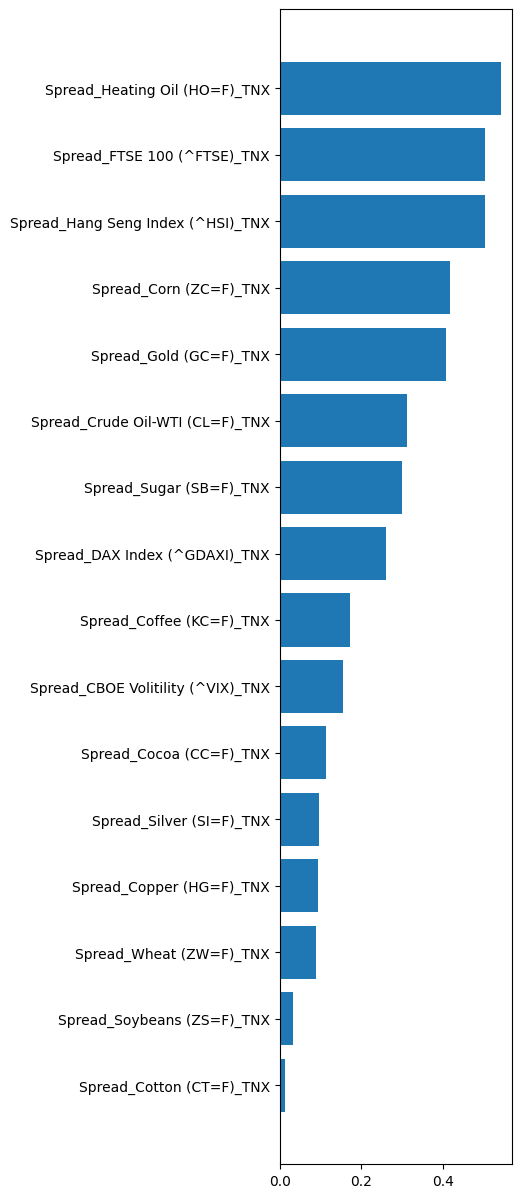

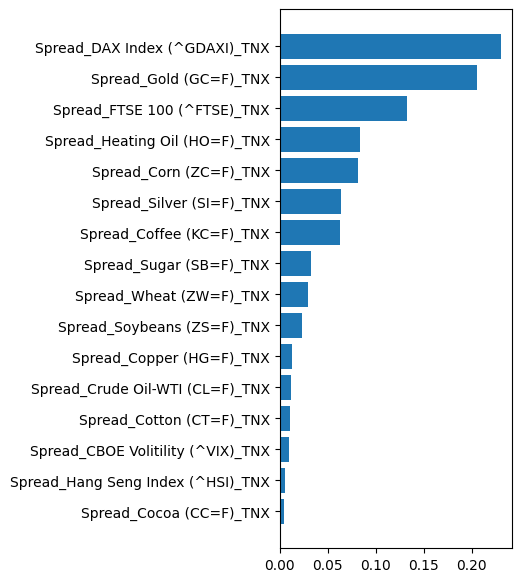

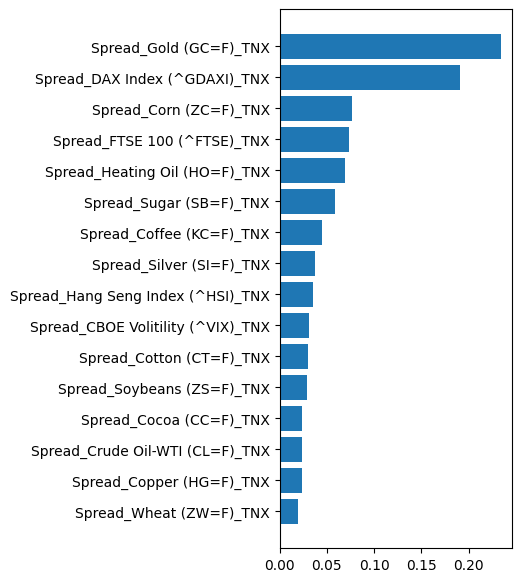

In [36]:
import time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

feature_cols = ['Spread_CBOE Volitility (^VIX)_TNX',
 'Spread_Cocoa (CC=F)_TNX',
 'Spread_Coffee (KC=F)_TNX',
 'Spread_Copper (HG=F)_TNX',
 'Spread_Corn (ZC=F)_TNX',
 'Spread_Cotton (CT=F)_TNX',
 'Spread_Crude Oil-WTI (CL=F)_TNX',
 'Spread_DAX Index (^GDAXI)_TNX',
 'Spread_FTSE 100 (^FTSE)_TNX',
 'Spread_Gold (GC=F)_TNX',
 'Spread_Hang Seng Index (^HSI)_TNX',
 'Spread_Heating Oil (HO=F)_TNX',
 'Spread_Silver (SI=F)_TNX',
 'Spread_Soybeans (ZS=F)_TNX',
 'Spread_Sugar (SB=F)_TNX',
 'Spread_Wheat (ZW=F)_TNX']

X = X_train_val[feature_cols].copy()
y = y_train_val.copy()

start_time = time.time()
a = train_kNN(X,y)
print(a)
print("%s seconds" % a[4])

start_time = time.time()
b = train_logistic(X,y,reg='l1')
print(b)
print("%s seconds" % b[4])

start_time = time.time()
c = train_RF(X,y,reg='none')
print(c)
print("%s seconds" % c[4])

start_time = time.time()
d = train_GBM(X,y,reg='none')
print(d)
print("%s seconds" % d[4])

<div class="alert alert-info">

### Model Results and Discussion
    
</div>

The comparison of machine learning models provided shows the following:

1. **kNN Regressor**: Exhibited the lowest performance in terms of accuracy, both on training and test data. The run time was quick, but not the quickest.

2. **Logistic Regression (L1)**: Offered a good balance between training and test accuracy, suggesting it generalizes well. It had the shortest run time, making it the fastest model in this lineup.

3. **Random Forest**: Performed better than logistic regression in accuracy but took longer to run. However, it was much quicker than Gradient Boosting while still providing insight into feature importance.

4. **Gradient Boosting Method**: Achieved the highest training accuracy and a strong test accuracy, indicating it's the most effective model at learning from the training data and generalizing to new data. However, it also had the longest run time.

A comprehensive grid search of various hyperparameters highlighted the **Gradient Boosting Classifier** as the standout performer if the primary concern is prediction accuracy. Despite having the longest runtime at 14 seconds, it boasts the highest training accuracy, signifying a robust capacity to learn from the training dataset. It's important to note, however, that while the test accuracy remains superior compared to other models, it hints at the possibility of overfitting. Nonetheless, the model exhibits significant predictive prowess.

In [37]:
cols = ['Machine Learning Method', 'Train Accuracy','Test Accuracy', 'Best Parameter', 'Top Predictor Variable', 'Run Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c
df2.loc[3] = d

df2

,Machine Learning Method,Train Accuracy,Test Accuracy,Best Parameter,Top Predictor Variable,Run Time
0,kNN Regressor,0.456658,0.541131,n_neighbors = 6,N/A,0.126014
1,Logistic (l1),0.731840,0.729947,C = 1.0,Spread_Heating Oil (HO=F)_TNX,0.289626
2,Random Forest,0.772059,0.754456,Max_depth = 5,Spread_DAX Index (^GDAXI)_TNX,1.195948
3,Gradient Boosting Method,0.929256,0.820856,Max_depth = 5,Spread_Gold (GC=F)_TNX,6.655165


<div class="alert alert-info">

## Model Evaluation
    
</div>

Examining the performance metrics further reveals that the Gradient Boost model achieves unparalleled precision and recall across all classes compared to its counterparts, demonstrating a commendable balance in minimizing false positives and negatives. Its overall accuracy is remarkable, standing at an impressive 93%.

In [38]:
# Define a function to train a model, predict and return classification report as a string
def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    report = classification_report(y_test, pred, output_dict=True)
    return pd.DataFrame(report).transpose()

# Set up the models with their respective parameters
models = {
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, max_depth=5),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, max_depth=5),
    "Logistic Regression": LogisticRegression(C=1.0),
}

# Initialize an empty DataFrame to store classification reports
reports_df = pd.DataFrame()

# Assuming X_train, X_test, y_train, y_test are already defined
for model_name, model in models.items():
    report = train_and_evaluate_model(model, model_name, X_train_val, y_train_val, X_test, y_test)
    report['Model'] = model_name  # Add model name as a column
    reports_df = pd.concat([reports_df, report])

# Reset index to make Model a column
reports_df.reset_index(inplace=True)

# Rename 'index' column to 'Class'
reports_df.rename(columns={'index': 'Class'}, inplace=True)

# Set 'Model' and 'Class' as the multi-index
reports_df.set_index(['Model', 'Class'], inplace=True)

display(reports_df.round(4))

precision  recall  f1-score  \
Model                        Class                                       
Gradient Boosting Classifier -1               0.8647  0.9112    0.8874   
                             0                0.5645  0.3302    0.4167   
                             1                0.8534  0.8980    0.8752   
                             accuracy         0.8397  0.8397    0.8397   
                             macro avg        0.7609  0.7131    0.7264   
                             weighted avg     0.8259  0.8397    0.8288   
Random Forest Classifier     -1               0.7805  0.8972    0.8348   
                             0                0.0000  0.0000    0.0000   
                             1                0.7658  0.8458    0.8038   
                             accuracy         0.7735  0.7735    0.7735   
                             macro avg        0.5154  0.5810    0.5462   
                             weighted avg     0.6858  0.7735    0.7269   
Logistic Regression          -1               0.7531  0.8411    0.7947   
                             0                0.0000  0.0000    0.0000   
                             1                0.7183  0.8184    0.7651   
                             accuracy         0.7361  0.7361    0.7361   
                             macro avg        0.4905  0.5532    0.5199   
                             weighted avg     0.6529  0.7361    0.6920   

                                            support  
Model                        Class                   
Gradient Boosting Classifier -1            428.0000  
                             0             106.0000  
                             1             402.0000  
                             accuracy        0.8397  
                             macro avg     936.0000  
                             weighted avg  936.0000  
Random Forest Classifier     -1            428.0000  
                             0             106.0000  
                             1             402.0000  
                             accuracy        0.7735  
                             macro avg     936.0000  
                             weighted avg  936.0000  
Logistic Regression          -1            428.0000  
                             0             106.0000  
                             1             402.0000  
                             accuracy        0.7361  
                             macro avg     936.0000  
                             weighted avg  936.0000

The Proportion Chance Criterion (PCC) is also looked at. It is a statistical measure used to evaluate the performance of a model against random chance. 

The general accuracy figures as seen above surpasses 1.25 times the PCC, which confirms that the model is providing predictions with a reliability that is not just due to random chance, thus affirming the effectiveness of the machine learning approach in this scenario.

Population per class:       0
 1  1636
-1  1691
 0   413
Proportion Chance Criterion: 40.80%
1.25 * Proportion Chance Criterion: 51.00%


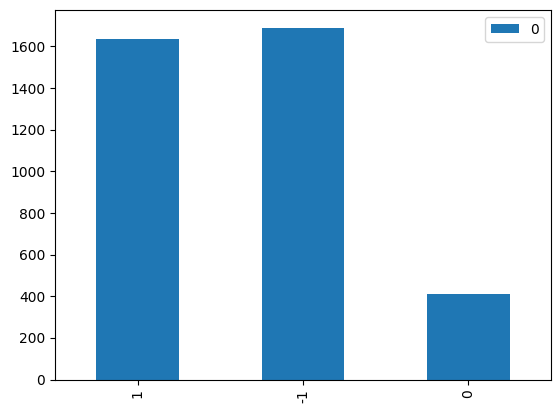

In [40]:
from collections import Counter
state_counts = Counter(y)
df_target = pd.DataFrame.from_dict(state_counts, orient='index')
df_target.plot(kind='bar')

num=(df_target[0]/df_target[0].sum())**2

print("Population per class:{}".format(df_target))

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

For additional insight, the chart below shows gold as the top predictor in forecasting future spreads, which suggests that gold's price movements are highly indicative of the market dynamics relevant to the study. Gold is often seen as a 'safe haven' asset and may have strong predictive relationships with other financial instruments during periods of market volatility or uncertainty. Its importance in the model could imply that changes in gold prices are a strong signal of wider market shifts that could affect the spread between natural gas and US 10-Year yields.

Weight of the top predictor = 0.182361
Top Predictor = Spread_Gold (GC=F)_TNX


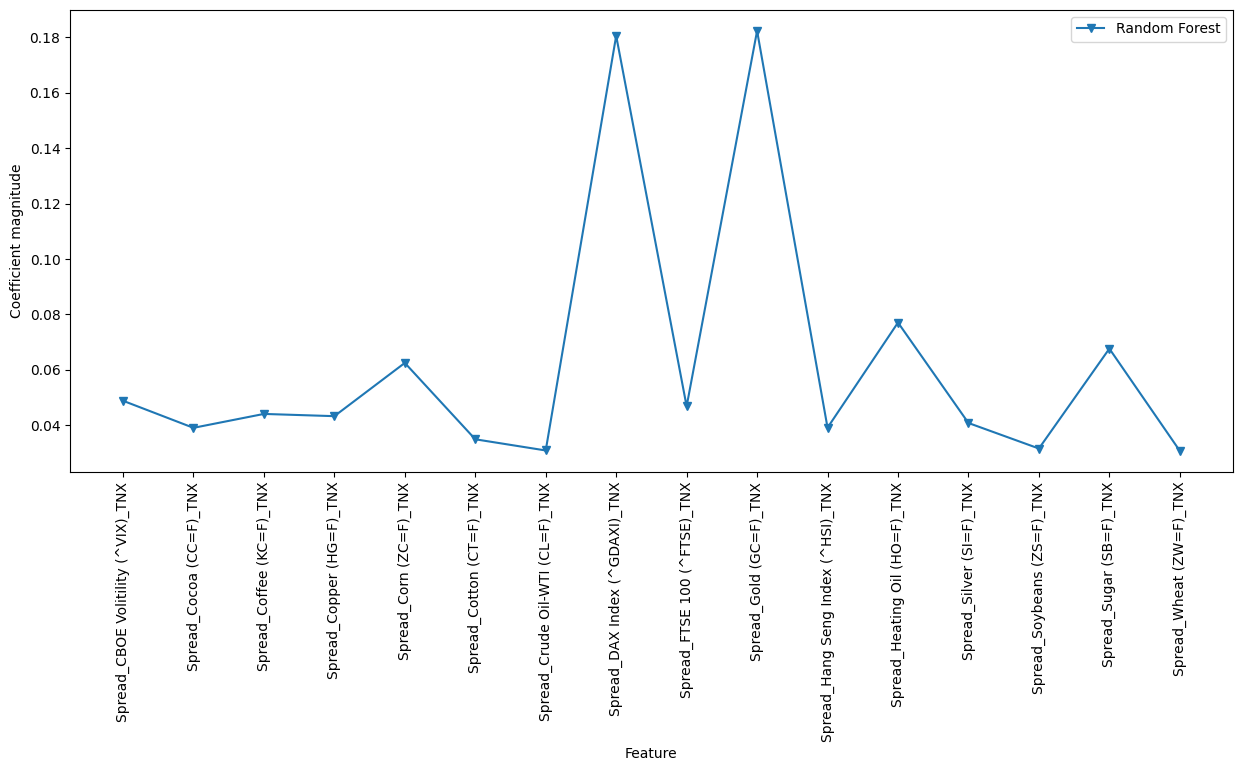

In [41]:
# Generate feature importance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
svc = GradientBoostingClassifier(n_estimators=100, max_depth=5).fit(X_train, y_train)
coefs = svc.feature_importances_

df_features = X_train_val[feature_cols]

fig = plt.figure(figsize=(15, 6))
plt.plot(coefs.T, '-v', label="Random Forest")
plt.xticks(range(df_features.shape[1]), df_features.columns, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

print("Weight of the top predictor = %f" %np.amax(np.abs(coefs.T)))
print("Top Predictor = %s" %df_features.columns[np.argmax(np.abs(coefs.T))])

<div class="alert alert-info">

## Conclusion 
    
</div>

Advancing to practical application, we utilized the most current dataset to forecast the subsequent spread, employing the Gradient Boost model. The prediction indicated a convergence in the next spread.

The following snip illustrates the predicted spread level for November 30th, which has indeed shown a slight convergence, affirming our model’s capability to accurately forecast market movements.

In [42]:
X_sorted = X.sort_values(by='Date')
display(X_sorted.tail(1))

,Spread_CBOE Volitility (^VIX)_TNX,Spread_Cocoa (CC=F)_TNX,Spread_Coffee (KC=F)_TNX,Spread_Copper (HG=F)_TNX,Spread_Corn (ZC=F)_TNX,Spread_Cotton (CT=F)_TNX,Spread_Crude Oil-WTI (CL=F)_TNX,Spread_DAX Index (^GDAXI)_TNX,Spread_FTSE 100 (^FTSE)_TNX,Spread_Gold (GC=F)_TNX,Spread_Hang Seng Index (^HSI)_TNX,Spread_Heating Oil (HO=F)_TNX,Spread_Silver (SI=F)_TNX,Spread_Soybeans (ZS=F)_TNX,Spread_Sugar (SB=F)_TNX,Spread_Wheat (ZW=F)_TNX
Date,,,,,,,,,,,,,,,,
2023-11-28,-1,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1


In [43]:
# Split into training and test set (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Fit the model
svc = GradientBoostingClassifier(n_estimators=100, max_depth=5).fit(X_train, y_train)

# Use the last known feature values as input for November 30 prediction
nov_30_features = X.iloc[-1].values.reshape(1, -1)

# Predict the spread for November 30
predicted_spread = svc.predict(nov_30_features)

# Output the prediction
predicted_spread_label = predicted_spread[0]
spread_label_mapping = {0: 'steady', 1: 'divergence', -1: 'convergence'}
nov_30_prediction = spread_label_mapping.get(predicted_spread_label, 'Unknown')

print(f"The predicted spread label for 'Spread_Natural Gas (NG=F)_TNX' on November 30, 2023, is: {nov_30_prediction}")

The predicted spread label for 'Spread_Natural Gas (NG=F)_TNX' on November 30, 2023, is: convergence


In [45]:
from IPython.display import Image
Image(url="../images/Snip.png")